### Импорт неоюбходимых библиотек

In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [348]:
%matplotlib inline

### Загрузка данных

In [349]:
df=pd.read_csv("df.csv", sep=";")

In [350]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,"1,60",1,0,0,1,0,0,0
1,2,45,19,34,90089,3,"1,50",1,0,0,1,0,0,0
2,3,39,15,11,94720,1,"1,00",1,0,0,0,0,0,0
3,4,35,9,100,94112,1,"2,70",2,0,0,0,0,0,0
4,5,35,8,45,91330,4,"1,00",2,0,0,0,0,0,1


## Описание признаков

* ID: Идентификатор клиента
* Age: Возраст клиента (в полных годах)
* Experience: Количество лет профессионального опыта
* Income: Годовой доход клиента ($000)
ZIPCode: Почтовый индекс домашнего адреса
* Family: Размер семьи клиента
* CCAvg: Средние расходы по кредитным картам в месяц ($)
* Education: Уровень образования:
Бакалавр
Магистр
Высшее/Профессиональное
* Mortgage: Сумма ипотеки, если есть ($)
* Personal Loan: Принял ли клиент предложенный личный кредит в последней кампании?
* Securities Account: Есть ли у клиента счет с ценными бумагами в банке?
* CD Account: Есть ли у клиента счет депозитного сертификата (CD) в банке?
* Online: Использует ли клиент интернет-банкинг?
* CreditCard: Использует ли клиент кредитную карту, выданную UniversalBank?

Целевой признаков - **Personal Loan**

## Разведочный анализ данных (РАД)

In [351]:
# Вывод количества записей и признаков
df.shape

(5000, 14)

In [352]:
# Вывод типов данных
df.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIP Code               int64
Family                 int64
CCAvg                 object
Education              int64
Mortgage               int64
Personal Loan          int64
Securities Account     int64
CD Account             int64
Online                 int64
CreditCard             int64
dtype: object

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [354]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке ID = 0
Кол-во пропусков в колонке Age = 0
Кол-во пропусков в колонке Experience = 0
Кол-во пропусков в колонке Income = 0
Кол-во пропусков в колонке ZIP Code = 0
Кол-во пропусков в колонке Family = 0
Кол-во пропусков в колонке CCAvg = 0
Кол-во пропусков в колонке Education = 0
Кол-во пропусков в колонке Mortgage = 0
Кол-во пропусков в колонке Personal Loan = 0
Кол-во пропусков в колонке Securities Account = 0
Кол-во пропусков в колонке CD Account = 0
Кол-во пропусков в колонке Online = 0
Кол-во пропусков в колонке CreditCard = 0


In [355]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [356]:
# исследование целевого (target) признака - факта ухода клиента 
print('кол-во уникальных значений в таргете: ', df['Personal Loan'].nunique())
print('перечень уникальных значений в таргете: ', df['Personal Loan'].unique())
print('статистика распределения значений в таргете: \n', df['Personal Loan'].value_counts(normalize=True))

кол-во уникальных значений в таргете:  2
перечень уникальных значений в таргете:  [0 1]
статистика распределения значений в таргете: 
 Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


In [357]:
df.drop("ID", axis=1, inplace=True)
df.drop("ZIP Code", axis=1, inplace=True)

In [358]:
# описательная статистика для всех (числовых) признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.1046,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.7742,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.3964,1.147663,1.0,1.0,2.0,3.0,4.0
Education,5000.0,1.8810,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.4988,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.0960,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.1044,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.0604,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.5968,0.490589,0.0,0.0,1.0,1.0,1.0


В наборе данных присутствуют аномальное значение, такое как: 
* Experience - минимальное значение равно -3.

In [359]:
# Количество записей с Experience < 0
len(df[df["Experience"] < 0])

52

## Предобработка данных

In [360]:
# Переводим признае CCAvg из строкового в числовой тип данных
df['CCAvg'] = df['CCAvg'].str.replace(',', '.').astype(float)

In [361]:
# Удаляем записи, где опыт работы меньше 0, так как их мало и не внесут больших изменений.
df = df[df["Experience"]>=0]

In [362]:
# описательная статистика для всех (числовых) признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4948.0,45.557195,11.320735,24.0,36.00,46.0,55.0,67.0
Experience,4948.0,20.331043,11.311973,0.0,10.75,20.0,30.0,43.0
Income,4948.0,73.814470,46.112596,8.0,39.00,64.0,98.0,224.0
Family,4948.0,2.391471,1.148444,1.0,1.00,2.0,3.0,4.0
CCAvg,4948.0,1.935926,1.747694,0.0,0.70,1.5,2.6,10.0
Education,4948.0,1.878941,0.839745,1.0,1.00,2.0,3.0,3.0
Mortgage,4948.0,56.634398,101.828885,0.0,0.00,0.0,101.0,635.0
Personal Loan,4948.0,0.097009,0.296000,0.0,0.00,0.0,0.0,1.0
Securities Account,4948.0,0.104285,0.305660,0.0,0.00,0.0,0.0,1.0
CD Account,4948.0,0.061035,0.239418,0.0,0.00,0.0,0.0,1.0


## Визуальный анализ

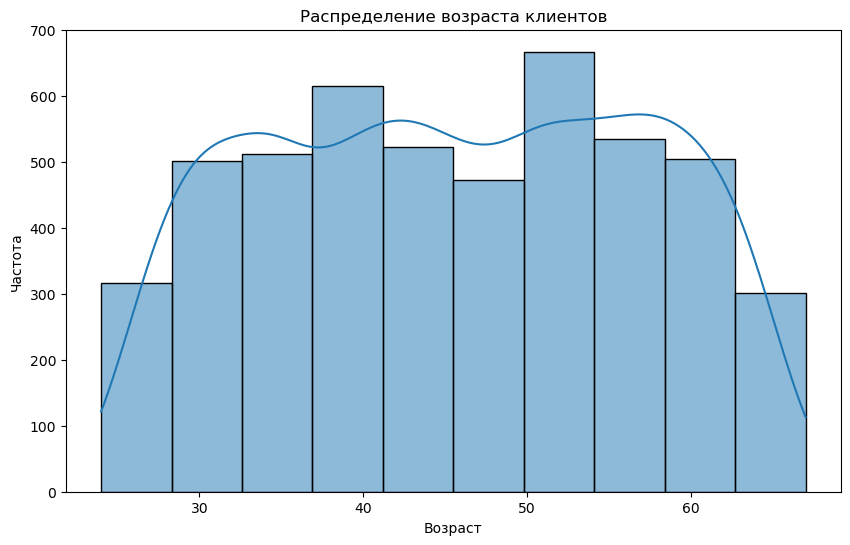

In [363]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

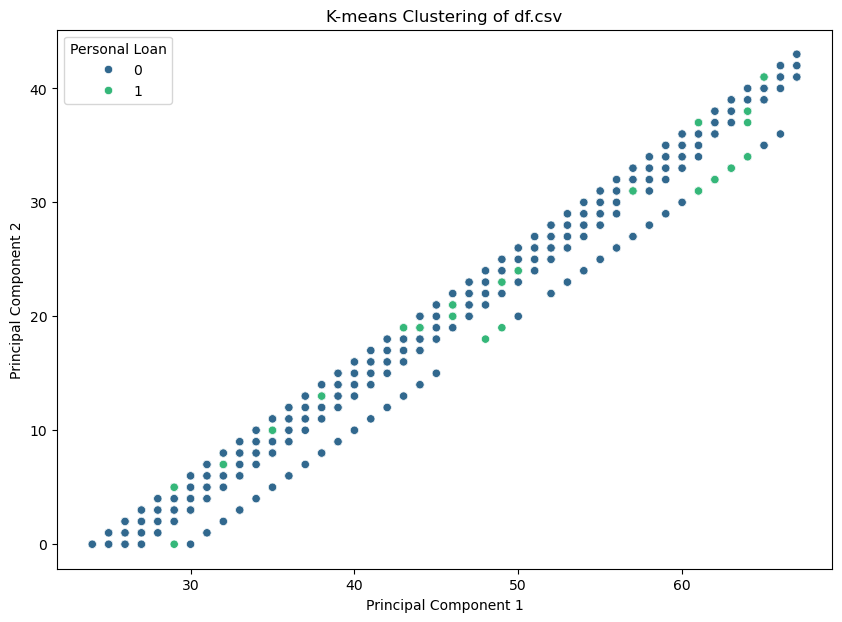

In [364]:
# Визуализация результатов кластеризации
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Experience', hue='Personal Loan', data=df, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of df.csv')
plt.show()

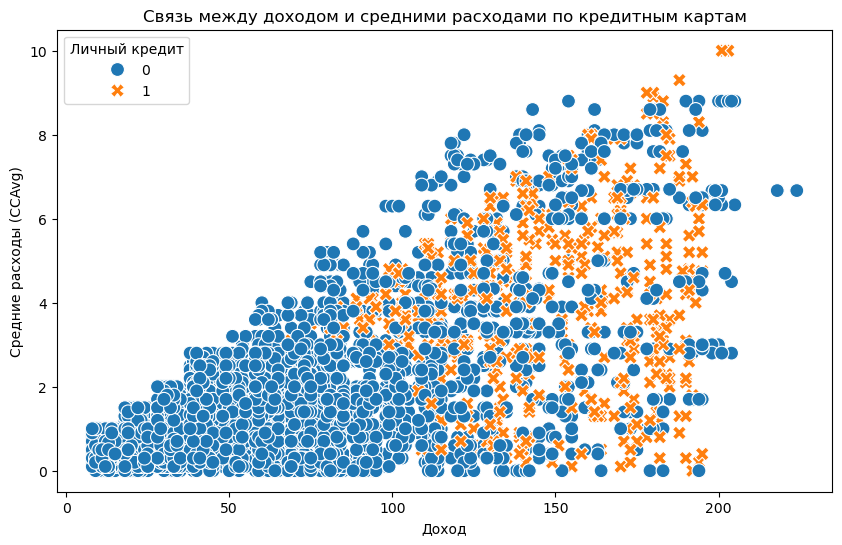

In [365]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='CCAvg', hue='Personal Loan', style='Personal Loan', s=100)
plt.title('Связь между доходом и средними расходами по кредитным картам')
plt.xlabel('Доход')
plt.ylabel('Средние расходы (CCAvg)')
plt.legend(title='Личный кредит')
plt.show()

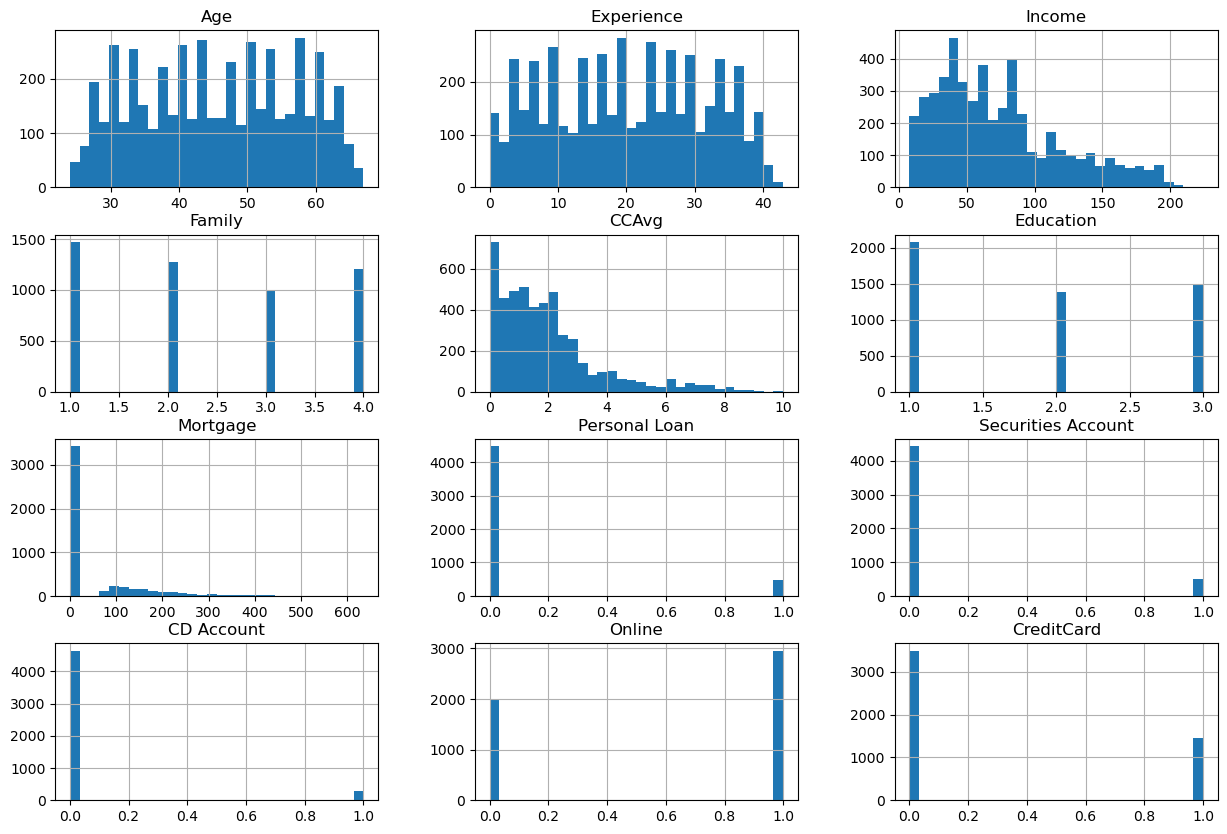

In [366]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

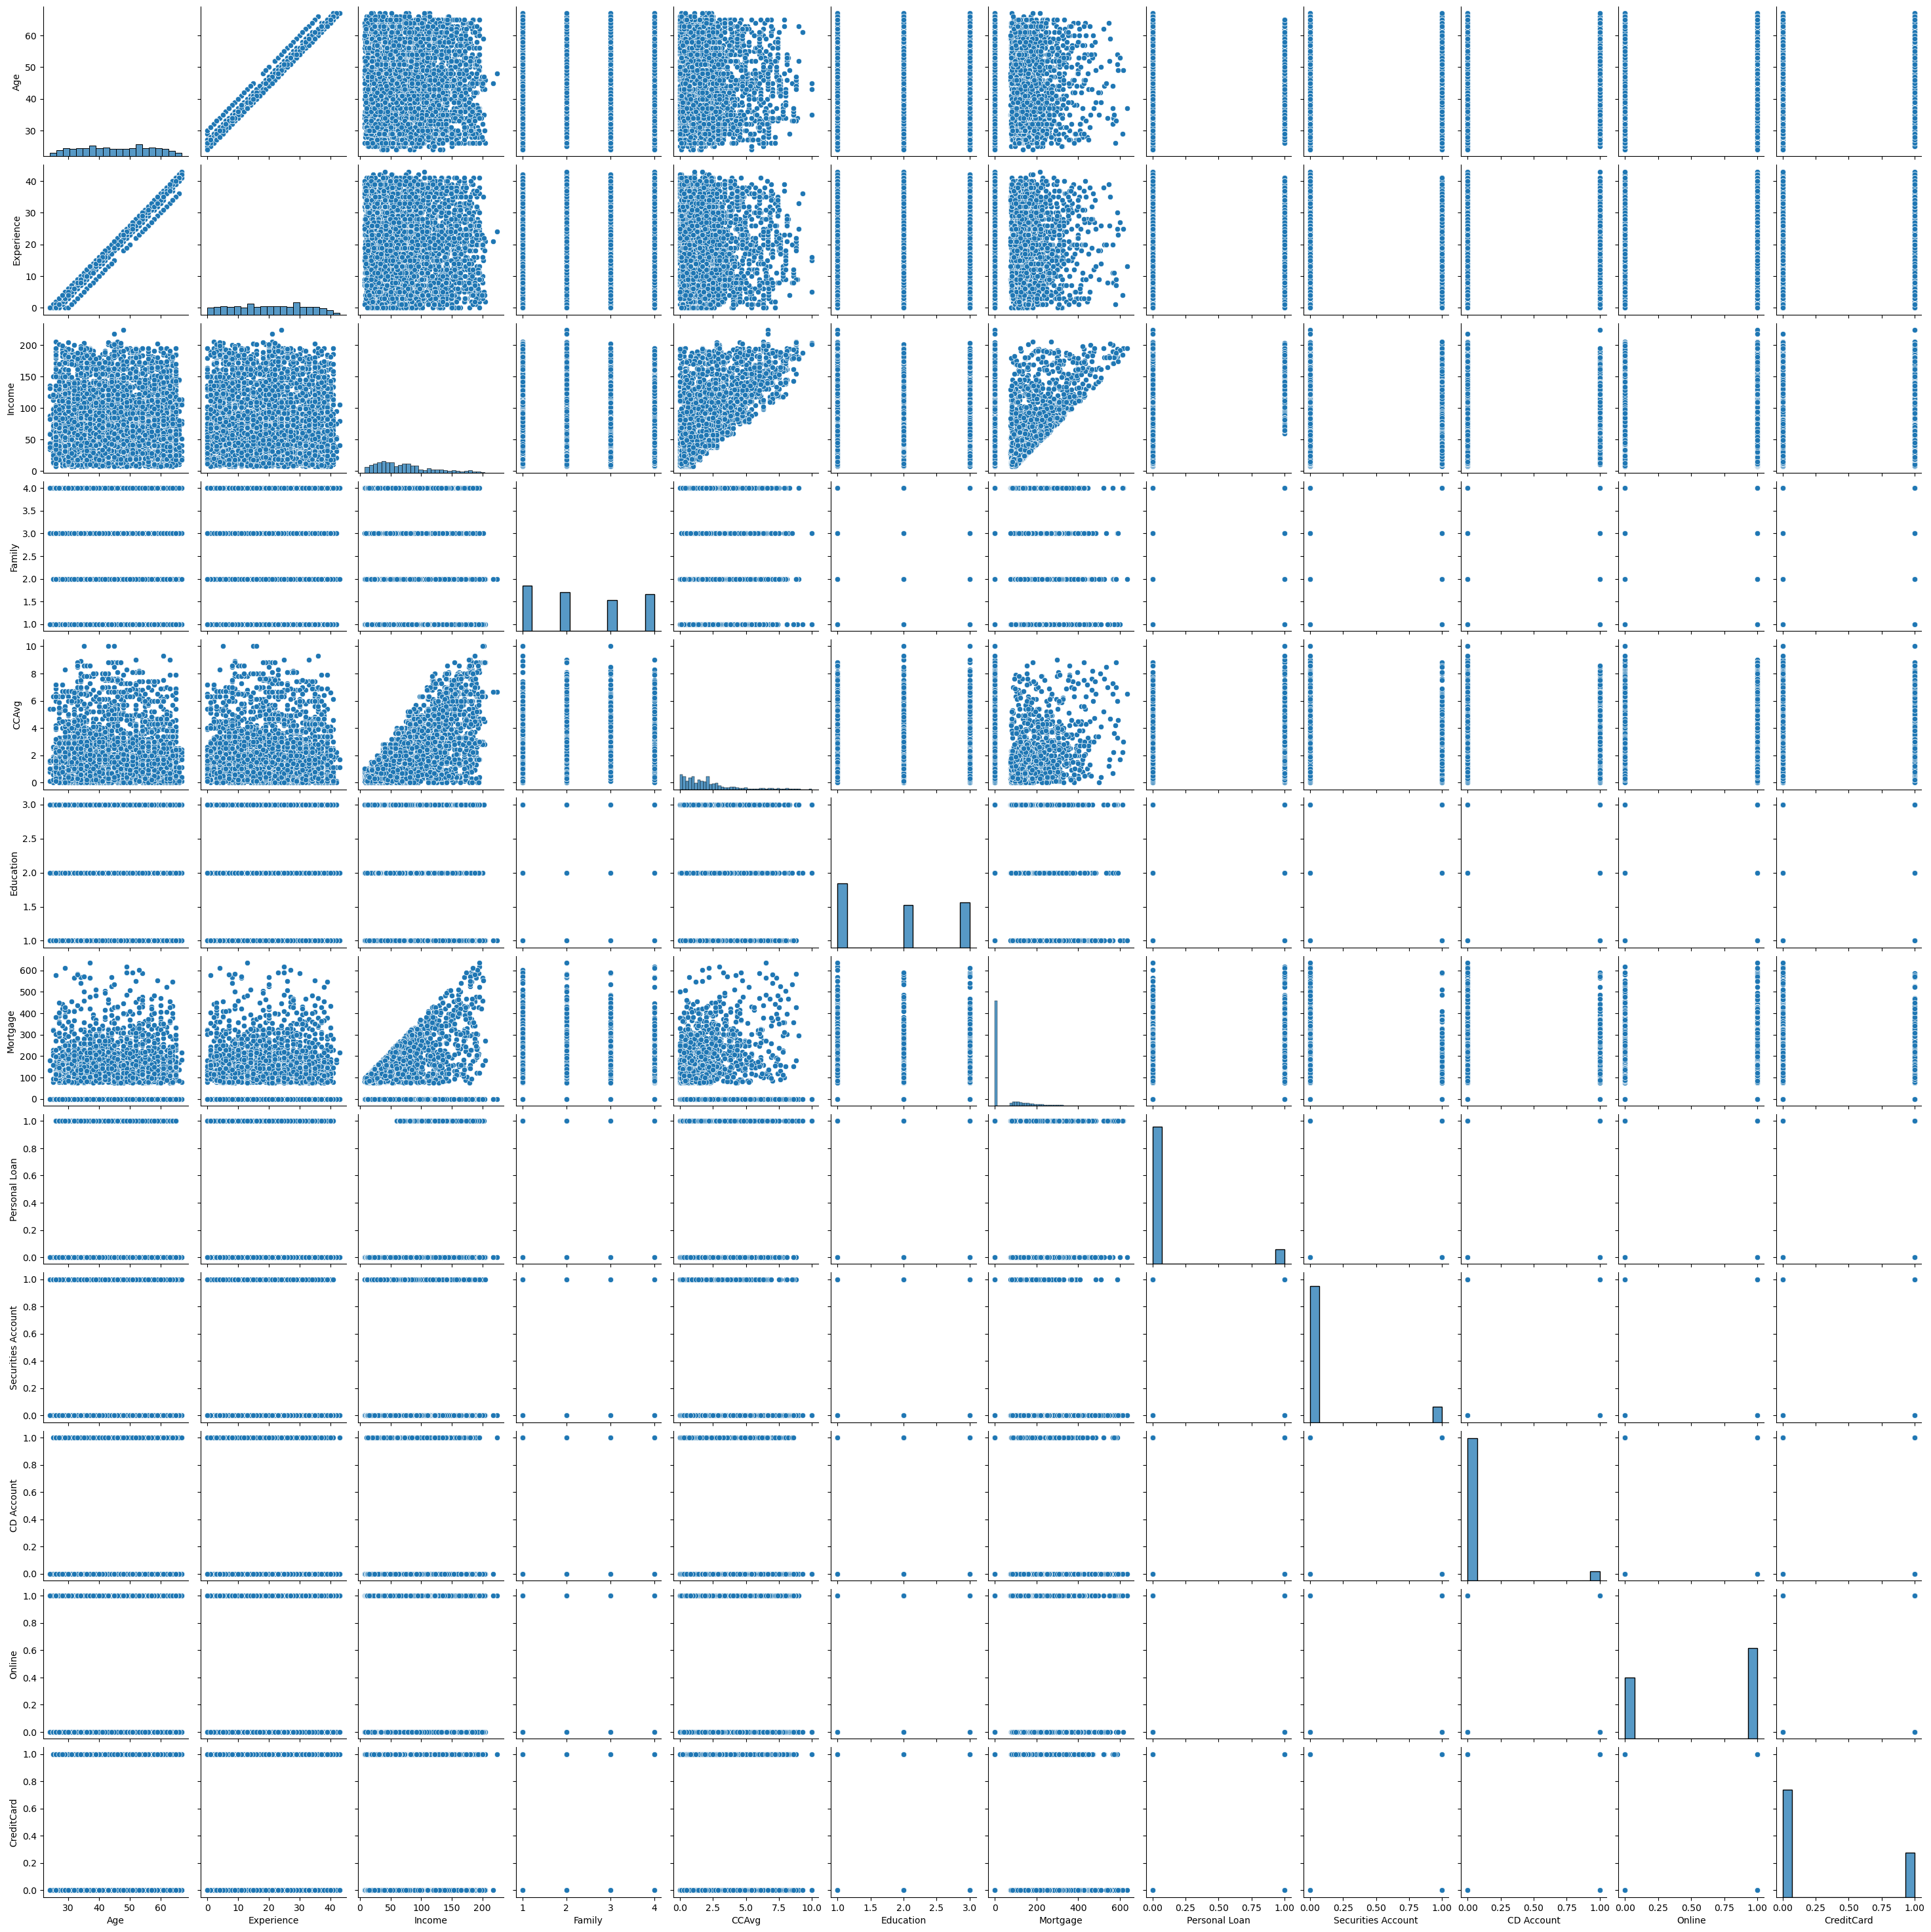

In [367]:
sns.pairplot(df)
plt.show()

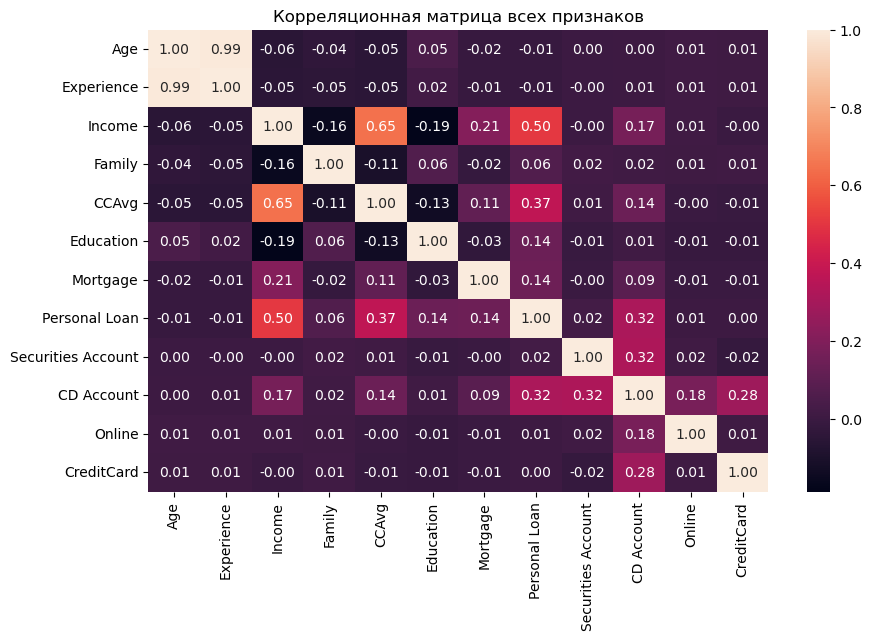

In [369]:
# Корреляционная матрица
plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Корреляционная матрица всех признаков')
plt.show()

Присутствует зависимость между следующими признаками:
* Age и Experience
* CCAvg и Income, так же есть средняя зависимость с Personal Loan
* Personal Loan и Income, так же есть умеренная зависимость с CD Account

## Modelling

In [370]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [371]:
X = df.drop("Personal Loan", axis=1)
y = df['Personal Loan']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### RandomForestClassifier

In [372]:
from sklearn.ensemble import RandomForestClassifier

In [373]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

# Предсказания на тестовом наборе
y_pred = rfc.predict(X_test_scaled)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Отчет о классификации
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9865278628291488

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1493
           1       0.98      0.86      0.92       140

    accuracy                           0.99      1633
   macro avg       0.98      0.93      0.95      1633
weighted avg       0.99      0.99      0.99      1633



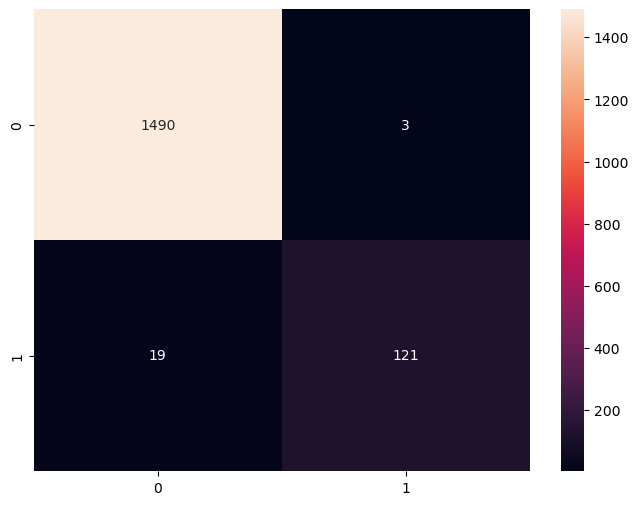

In [374]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

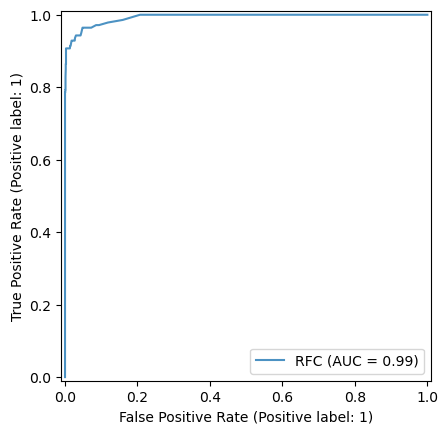

In [375]:
from sklearn.metrics import RocCurveDisplay
roc_display_rfc = RocCurveDisplay.from_estimator(rfc, X_test_scaled, y_test, name='RFC', alpha=0.8)

### GaussianNB

In [376]:
from sklearn.naive_bayes import GaussianNB

In [377]:
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)

# Предсказания на тестовом наборе
y_pred = gnb_model.predict(X_test_scaled)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Отчет о классификации
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8818126148193509

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1493
           1       0.37      0.55      0.44       140

    accuracy                           0.88      1633
   macro avg       0.66      0.73      0.69      1633
weighted avg       0.91      0.88      0.89      1633



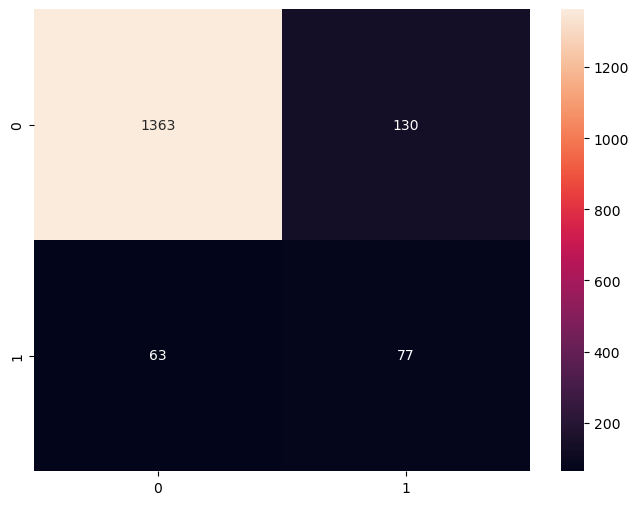

In [378]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

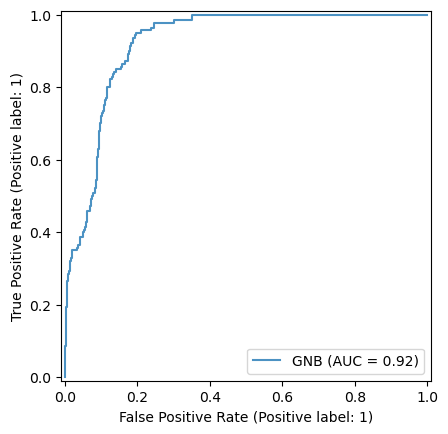

In [379]:
from sklearn.metrics import roc_auc_score
roc_display_gnb = RocCurveDisplay.from_estimator(gnb_model, X_test_scaled, y_test, name='GNB', alpha=0.8)


### KNeighborsClassifier

In [380]:
from sklearn.neighbors import KNeighborsClassifier

In [381]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # Вы можете изменить количество соседей
knn_model.fit(X_train_scaled, y_train)

# Предсказания на тестовом наборе
y_pred = knn_model.predict(X_test_scaled)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Вычисление AUC для KNN
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])
print(f'AUC for KNN: {auc_knn:.4f}')

Accuracy: 0.9626454378444581

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1493
           1       0.94      0.60      0.73       140

    accuracy                           0.96      1633
   macro avg       0.95      0.80      0.86      1633
weighted avg       0.96      0.96      0.96      1633

AUC for KNN: 0.9419


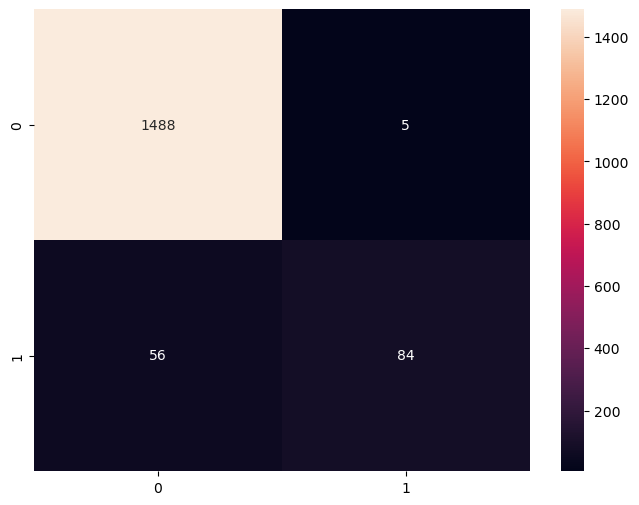

In [382]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

<Figure size 1200x600 with 0 Axes>

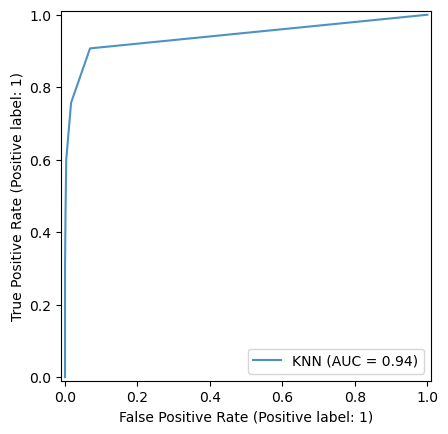

In [383]:
# Построение ROC-кривой для KNN
plt.figure(figsize=(12, 6))
roc_display_knn = RocCurveDisplay.from_estimator(knn_model, X_test_scaled, y_test, name='KNN', alpha=0.8)

## Вывод

В представленном наборе данных было 1 аномальное значение, которое было удалено, так как записи не имели значимости из за малого количества.
Обучая модели выяснилось, что модель RandomForestClassifier предсказывает лучше всего, но и KNeighborsClassifier не сильно отстаёт.
Хуже всего себя показала модель - GaussianNB.